# Example Notebook: Regression and Classification with Nanograd
This example notebook demonstrates how to use **Nanograd** for both regression and classification tasks.

---
## 1. Setup


In [2]:


import numpy as np
from engine import ValueTensor
from model import MLP
from optim import SGD
from objective import mse, cross_entropy


---

## 2. Regression Example: California Housing



### 2.1 Load and preprocess data


In [11]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fetch dataset
X, y = fetch_california_housing(return_X_y=True)
y = y.reshape(-1, 1)

# Standardize
scX = StandardScaler(); scY = StandardScaler()
X = scX.fit_transform(X)
y = scY.fit_transform(y)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Wrap in ValueTensor
X_train_t = ValueTensor(X_train)
Y_train_t = ValueTensor(y_train)
X_val_t   = ValueTensor(X_val)
Y_val_t   = ValueTensor(y_val)


### 2.2 Build model


In [12]:
# A simple 3-layer MLP
model = MLP([X.shape[1], 64, 32, 1], activation='relu')
optimizer = SGD(model.parameters(), lr=0.01)



### 2.3 Training loop


In [13]:
epochs = 500
for epoch in range(epochs):
    # Forward
    preds = model(X_train_t)
    loss = mse(Y_train_t, preds)
    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print train/val every 50 epochs
    if (epoch+1) % 50 == 0:
        val_preds = model(X_val_t)
        val_loss = mse(Y_val_t, val_preds)
        print(f"Epoch {epoch+1}/{epochs} \u2022 Train Loss: {loss.data.item():.4f} \u2022 Val Loss: {val_loss.data.item():.4f}")


Epoch 50/500 • Train Loss: 0.5298 • Val Loss: 0.5292
Epoch 100/500 • Train Loss: 0.4791 • Val Loss: 0.4831
Epoch 150/500 • Train Loss: 0.4556 • Val Loss: 0.4594
Epoch 200/500 • Train Loss: 0.4389 • Val Loss: 0.4421
Epoch 250/500 • Train Loss: 0.4255 • Val Loss: 0.4280
Epoch 300/500 • Train Loss: 0.4142 • Val Loss: 0.4160
Epoch 350/500 • Train Loss: 0.4044 • Val Loss: 0.4055
Epoch 400/500 • Train Loss: 0.3958 • Val Loss: 0.3963
Epoch 450/500 • Train Loss: 0.3881 • Val Loss: 0.3880
Epoch 500/500 • Train Loss: 0.3812 • Val Loss: 0.3807



### 2.4 Evaluate


In [14]:
# After training, compute final metrics
final_preds = model(X_val_t)
print("Final MSE:", mse(Y_val_t, final_preds).data)

Final MSE: [[0.38065161]]



---

## 3. Classification Example: Iris Dataset



### 3.1 Load and preprocess data


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Iris
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

# One-hot encode labels
enc = OneHotEncoder(sparse_output=False)  
y_onehot = enc.fit_transform(y)

# Standardize features
sc = StandardScaler()
X = sc.fit_transform(X)

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, stratify=y)

# Wrap tensors
X_train_t = ValueTensor(X_train)
Y_train_t = ValueTensor(y_train)
X_val_t   = ValueTensor(X_val)
Y_val_t   = ValueTensor(y_val)


### 3.2 Build model


In [20]:

# 4 inputs, 3 classes
model = MLP([4, 16, 16, 3], activation='relu')
optimizer = SGD(model.parameters(), lr=0.05)




### 3.3 Training loop


In [22]:
from objective import cross_entropy

epochs = 100
for epoch in range(epochs):
    # Forward
    logits = model(X_train_t)              # raw scores
    loss = cross_entropy(Y_train_t, logits)
    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Periodic accuracy
    if (epoch+1) % 20 == 0:
        # Compute train accuracy
        preds = logits.data.argmax(axis=1)
        labels = y_train.argmax(axis=1)
        acc = (preds == labels).mean()
        print(f"Epoch {epoch+1}/{epochs} \u2022 Loss: {loss.data.item():.4f} \u2022 Acc: {acc.item():.3f}")

Epoch 20/100 • Loss: 0.5919 • Acc: 0.792
Epoch 40/100 • Loss: 0.4488 • Acc: 0.867
Epoch 60/100 • Loss: 0.3796 • Acc: 0.892
Epoch 80/100 • Loss: 0.3361 • Acc: 0.917
Epoch 100/100 • Loss: 0.3024 • Acc: 0.917



### 3.4 Validation accuracy


In [23]:

val_logits = model(X_val_t)
val_preds = val_logits.data.argmax(axis=1)
val_labels = y_val.argmax(axis=1)
val_acc = (val_preds == val_labels).mean()
print("Validation Accuracy:", val_acc)

Validation Accuracy: 0.9333333333333333



---

## 4. Visualization


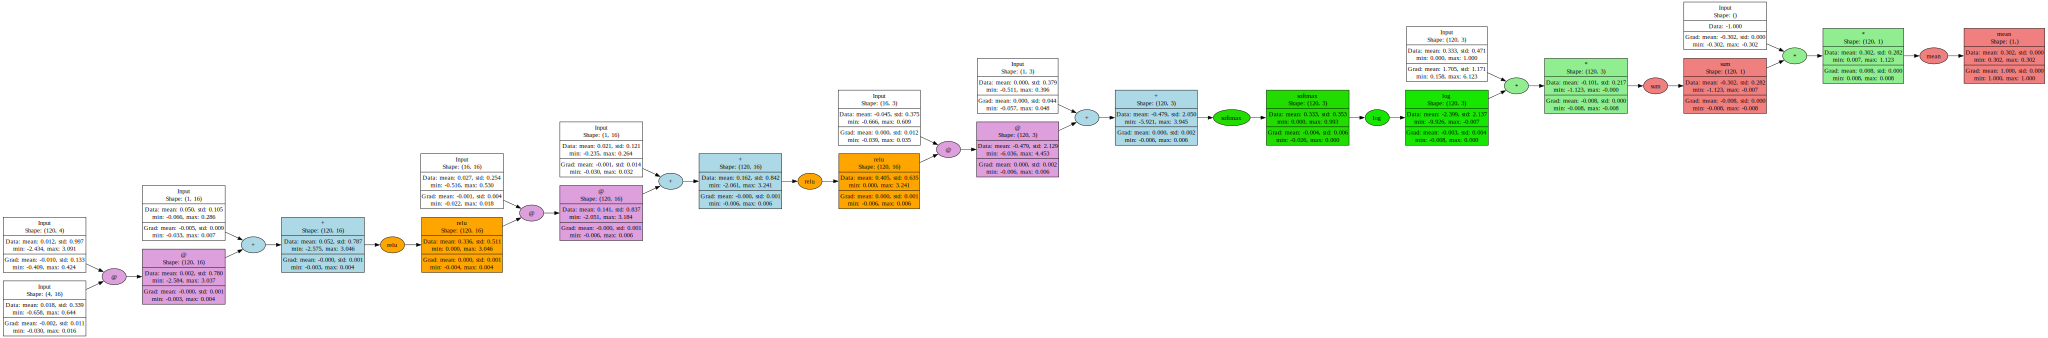

In [27]:

from visuals import draw_dot
# Visualize final computation graph of classification loss
dot = draw_dot(loss)
dot.render('iris_graph', format='svg', cleanup=False)
dot


---

*End of notebook.*

